# 1 - Librariers Importing
---

In [8]:
pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/d4/55/90db48d85f7689ec6f81c0db0622d704306c5284850383c090e6c7195a5c/pip-24.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 435.7 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.8 MB 1.1 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.8 MB 1.8 MB/s eta 0:00:01
   -------------- ------------------------- 0.7/1.8 MB 3.4 MB/s eta 0:00:01
   -------------------- ------------------- 1.0/1.8 MB 4.3 MB/s eta 0:00:01
   -------------------------------- ------- 1.5/1.8 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 5.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
Note: you may need to restart the kernel to use updated packages

In [10]:
pip install numpy pandas datetime matplotlib seaborn yfinance tabulate

  Using cached matplotlib-3.9.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached yfinance-0.2.44-py2.py3-none-any.whl.metadata (13 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
  Using cached contourpy-1.3.0-cp311-cp311-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp311-cp311-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached lxml-5.3.0-cp311-cp311-win_amd64.whl.metadata (3.9 kB)
  Using cached frozendict-2.4.4-py311-none-any.whl.metadata (23 kB)
  Using cached peewee-3.17.6-py3-none-any.whl
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
Using cached matplotlib-3.9.2-cp311-cp311-win_amd6

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from functools import reduce
from tabulate import tabulate
from matplotlib.ticker import FormatStrFormatter



In [ ]:
def display(data):
	print(tabulate(data, headers = 'keys', tablefmt = 'psql'))
	return

# 2 - Data Importing
---
## 2.1 - Import the series for all instruments (11) from 01-01-2015 to  16-04-2020
We get a list (11-length) of dataframes (6-column)

In [2]:
# 1 - Define `tickers` & `company names` for every instrument
stocks      = {'AAPL':'Apple', 'MSFT':'Microsoft', 'AMZN' : 'Amazon',  'GOOG': 'Google', 'META':'Meta','NFLX':'Netflix' ,  'NVDA' : 'NVIDIA'}
bonds       = {'HCA' : 'HCA', 'VRTX' :  'VRTX'}
commodities = {'BTC-USD' : 'Bitcoin', 'PA=F' : 'Palladium'}
instruments = {**stocks, **bonds, **commodities}
tickers     = list(instruments.keys())
instruments_data = {}
N = len(tickers)


# 2 - We will look at stock prices over the past years, starting at January 1, 2015
#                               01-01-2015 - 16-04-2020
start = datetime.datetime(2015,1,1)
end   = datetime.datetime(2020,4,16)

# 3 - Let's get instruments data based on the tickers.
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
for ticker, instrument in instruments.items():
  print("Loading data series for instrument {} with ticker = {}".format(instruments[ticker], ticker))
  instruments_data[ticker] = yf.download(ticker, start=start, end=end)


Loading data series for instrument Apple with ticker = AAPL


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Loading data series for instrument Microsoft with ticker = MSFT
Loading data series for instrument Amazon with ticker = AMZN


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Loading data series for instrument Google with ticker = GOOG
Loading data series for instrument Meta with ticker = META


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Loading data series for instrument Netflix with ticker = NFLX
Loading data series for instrument NVIDIA with ticker = NVDA



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Loading data series for instrument HCA with ticker = HCA
Loading data series for instrument VRTX with ticker = VRTX



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Loading data series for instrument Bitcoin with ticker = BTC-USD
Loading data series for instrument Palladium with ticker = PA=F


[*********************100%***********************]  1 of 1 completed


In [5]:
instruments_data['AAPL']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.373955,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.687311,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.689529,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.021711,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.944677,237458000
...,...,...,...,...,...,...
2020-04-08,65.684998,66.842499,65.307503,66.517502,64.711723,168895200
2020-04-09,67.175003,67.517502,66.175003,66.997498,65.178673,161834800
2020-04-13,67.077499,68.425003,66.457497,68.312500,66.458000,131022800


## 2.3 - Keep only `Adjusted Close` prices & Drop duplicates
We  keep the 11-length list of dataframes (1-column eventually). We will merge later on

In [6]:
## 2.3.1 - keep only `adjusted close` prices
for ticker, instrument in instruments.items():
  instruments_data[ticker] = instruments_data[ticker]["Adj Close"]


In [7]:
## 2.3.2 - Drop duplicates for palladium data from Yahoo Source 
instruments_data['PA=F'] = instruments_data['PA=F'].drop_duplicates()


## 2.4 - Inspect total trading days for all instruments ( = lengths of the respective dataframes)

In [8]:
tr_days = [ len(instr) for _, instr in instruments_data.items() ] 
tr_days = pd.DataFrame(tr_days, index = tickers, columns = ["Trading Days"])

In [9]:
tr_days.T

,AAPL,MSFT,AMZN,GOOG,META,NFLX,NVDA,HCA,VRTX,BTC-USD,PA=F
Trading Days,1330,1330,1330,1330,1330,1330,1330,1330,1330,1932,1284


In [10]:
tr_days_stocks_bonds = instruments_data['AAPL'].groupby([instruments_data['AAPL'].index.year]).agg('count')
tr_days_bitcoin      = instruments_data['BTC-USD'].groupby([instruments_data['BTC-USD'].index.year]).agg('count')
tr_days_palladium    = instruments_data['PA=F'].groupby([instruments_data['PA=F'].index.year]).agg('count')


tr_days_per_year = pd.DataFrame([tr_days_stocks_bonds,tr_days_bitcoin, tr_days_palladium], index = ["Stocks & Bonds", "Bitcoin", "Palladium"])


In [11]:
tr_days_per_year

Date,2015,2016,2017,2018,2019,2020
Stocks & Bonds,252,252,251,251,252,72
Bitcoin,365,366,365,365,365,106
Palladium,244,241,239,244,246,70


## 2.5 - Merging Dataframes
We convert the 11-length dictionary, to a new dataframe (11-column). Each column stands for the Adjusted Close price of the respective instrument.
* I tried using `pd.concat` but failed because of different sizes between 'Bitcoin' series and 'Palladium' series.
* We used `reduce` from `functools`, worked just fine

The result is a `dataframe` with shape $$1271 \times 11$$ 
so the common trading days were only T = 1271. Without `Palladium` the common tradings days were T = 1331 (so no recrods would be removed from stocks and bonds)


In [16]:
## 2.4 - Merging Dataframes
'''
    instruments_data = {'AAPL' : dataframe (1331 x 1),..., 'BTC-USD' : dataframe (1934 x 1), 'PA=F' : dataframe (1336 x 1)}
    [*] So list(instruments_data.values()) : we only keep the dataframes in a list
    [*] data_df = pd.concat(data, axis = 1).dropna() DID not wor because of different `commodities` sizes

'''
for ticker in tickers:
    instruments_data[ticker] = instruments_data[ticker].rename(f'{ticker}_Adj_Close')

data = list(instruments_data.values())
data_df = reduce(lambda x, y: pd.merge(x, y, left_index=True, right_index=True, how='outer'), data).dropna()
data_df.columns = [f'{ticker}' for ticker in tickers]


In [17]:
data_df

,AAPL,MSFT,AMZN,GOOG,META,NFLX,NVDA,HCA,VRTX,BTC-USD,PA=F
Date,,,,,,,,,,,
2015-01-02,24.373955,40.232861,15.426000,26.104546,78.214508,49.848572,0.483177,69.421783,123.070000,315.032013,794.849976
2015-01-05,23.687311,39.862885,15.109500,25.560379,76.958290,47.311428,0.475016,67.394592,121.029999,274.473999,793.200012
2015-01-06,23.689529,39.277805,14.764500,24.967966,75.921417,46.501431,0.460614,67.281990,117.360001,286.188995,800.400024
2015-01-07,24.021711,39.776840,14.921000,24.925188,75.921417,46.742859,0.459414,68.502045,120.660004,294.337006,792.450012
2015-01-08,24.944677,40.946991,15.023000,25.003778,77.945312,47.779999,0.476696,70.322769,123.970001,283.348999,793.099976
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-08,64.711723,158.692886,102.150002,60.365749,173.756836,371.119995,6.650321,104.253319,249.660004,7334.098633,2123.699951
2020-04-09,65.178673,158.702469,102.138000,60.424107,174.664108,370.720001,6.550672,104.253319,246.610001,7302.089355,2138.500000
2020-04-13,66.458000,159.058044,108.443497,60.728859,174.265305,396.720001,6.722567,99.960075,252.279999,6845.037598,2199.199951


In [18]:
tr_days_per_year = data_df['AAPL'].groupby([data_df['AAPL'].index.year]).agg('count')
tr_days_per_year = pd.DataFrame([tr_days_per_year], index = ["All instruments (merged)"])

In [19]:
tr_days_per_year

Date,2015,2016,2017,2018,2019,2020
All instruments (merged),244,241,239,244,246,70


## 2.6 - Plot `Adj Close` together


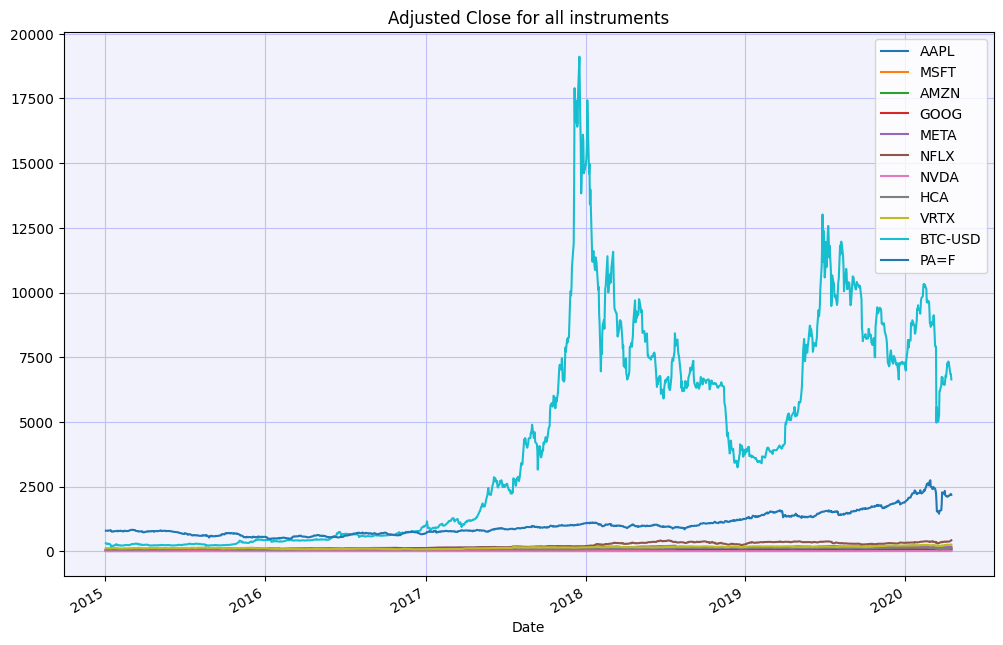

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
data_df.plot(ax = plt.gca(),grid = True)
ax.set_title('Adjusted Close for all instruments')
ax.set_facecolor((0.95, 0.95, 0.99))
ax.grid(c = (0.75, 0.75, 0.99))

# 3 - Calculate Descriptive Statistics
---


## 3.1 - Return
### Daily
---
A “better” solution, though, would be to plot the information we actually want: the stock’s returns. This involves transforming the data into something more useful for our purposes. There are multiple transformations we could apply
* **Simple Returns** : One transformation would be to consider the stock’s return since the beginning of the period of interest. In other words, we plot:
$$r_t = \frac{P_t}{P_0} - 1$$
* **Log Returns**
$$r_t = ln\left(\frac{P_t}{P_0}\right)$$

### Annual 
---
$$APR = R_{nominal} = r_{N} = ln\left(\frac{P_N}{P_0}\right) = ln\left(\frac{P_N}{P_{N-1}}\cdot \frac{P_{N-1}}{P_{N-2}} \cdot ... \frac{P_1}{P_{0}}\right)$$

$$APY = (1 + \frac{APR}{N})^{N} - 1 \longrightarrow R_{effective} = (1 + \frac{R_{nominal} }{N})^{N} - 1$$


### 3.1.1 - **Daily** : Simple Returns
It is similar to the actual value $P_t$, since the transformation do not affect much.

C:\Users\cya\AppData\Local\Temp\ipykernel_22936\2471427041.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  simple_returns = data_df.apply(lambda x: x / x[0] - 1)


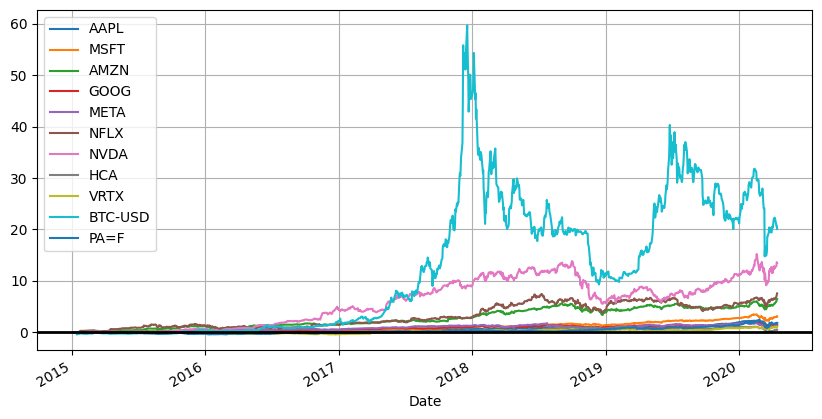

In [21]:
simple_returns = data_df.apply(lambda x: x / x[0] - 1)
simple_returns.plot(grid = True, figsize = (10,5)).axhline(y = 0, color = "black", lw = 2)

### 3.1.2 - **Daily** :  Log Returns

In [22]:
log_returns = data_df.pct_change()

In [23]:
log_returns

,AAPL,MSFT,AMZN,GOOG,META,NFLX,NVDA,HCA,VRTX,BTC-USD,PA=F
Date,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.028171,-0.009196,-0.020517,-0.020846,-0.016061,-0.050897,-0.016890,-0.029201,-0.016576,-0.128743,-0.002076
2015-01-06,0.000094,-0.014677,-0.022833,-0.023177,-0.013473,-0.017121,-0.030318,-0.001671,-0.030323,0.042682,0.009077
2015-01-07,0.014022,0.012705,0.010600,-0.001713,0.000000,0.005192,-0.002606,0.018133,0.028119,0.028471,-0.009933
2015-01-08,0.038422,0.029418,0.006836,0.003153,0.026658,0.022188,0.037618,0.026579,0.027432,-0.037331,0.000820
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-08,0.025595,0.010031,0.015609,0.020033,0.032281,-0.003116,0.030576,0.095832,0.008035,0.021973,0.000424
2020-04-09,0.007216,0.000060,-0.000117,0.000967,0.005222,-0.001078,-0.014984,0.000000,-0.012217,-0.004364,0.006969
2020-04-13,0.019628,0.002241,0.061735,0.005044,-0.002283,0.070134,0.026241,-0.041181,0.022992,-0.062592,0.028384


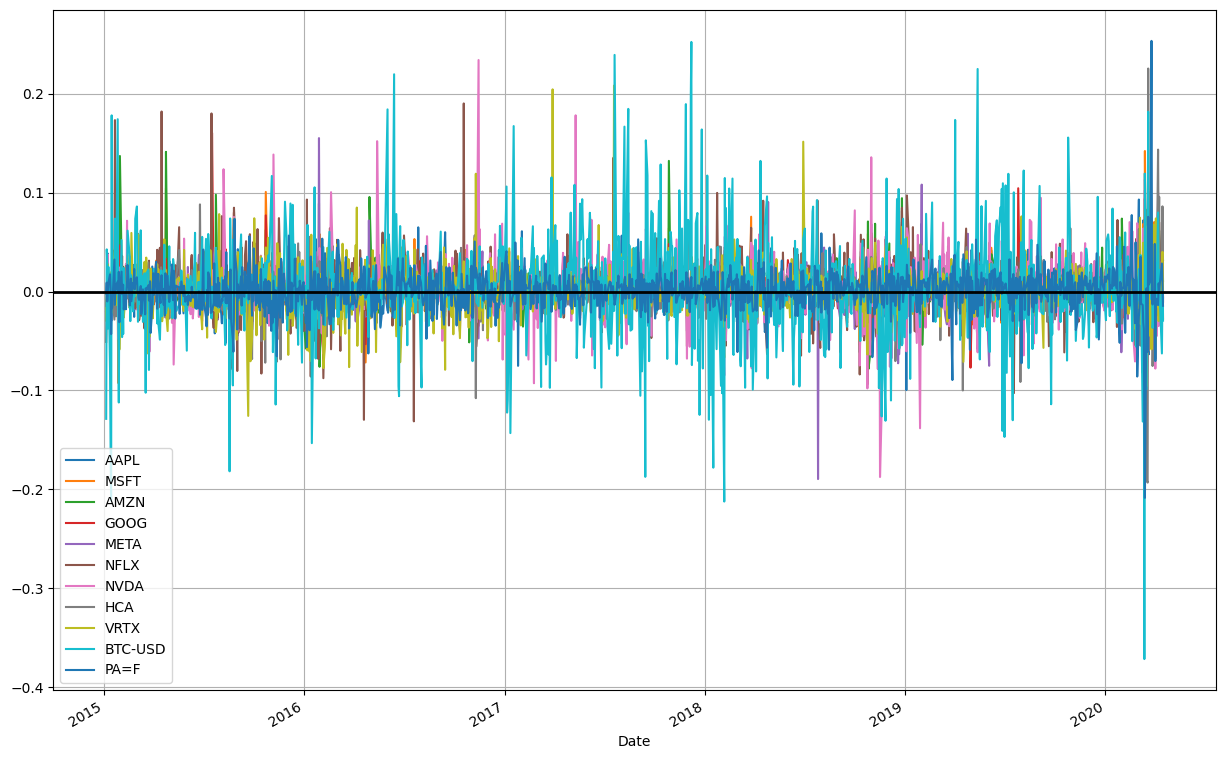

In [24]:
log_returns.plot(grid = True, figsize = (15,10)).axhline(y = 0, color = "black", lw = 2)

### 3.2.1 - **Annual** :  APR or $r_{nominal}$

In [25]:
APR = log_returns.groupby([log_returns.index.year]).agg('sum')
APR_avg = APR.mean()


In [26]:
APR

,AAPL,MSFT,AMZN,GOOG,META,NFLX,NVDA,HCA,VRTX,BTC-USD,PA=F
Date,,,,,,,,,,,
2015,0.014836,0.236813,0.839436,0.413261,0.321211,0.956530,0.567932,-0.041666,0.108067,0.536654,-0.305389
2016,0.145483,0.166098,0.146655,0.038112,0.135068,0.180147,1.275917,0.123294,-0.441285,0.929111,0.240298
2017,0.410633,0.352790,0.465440,0.316158,0.441837,0.475871,0.678012,0.192415,0.779508,3.151141,0.479285
2018,-0.014078,0.228277,0.315254,0.029964,-0.221129,0.439513,-0.239284,0.392850,0.156477,-1.060956,0.186188
2019,0.671959,0.475696,0.233878,0.284863,0.487565,0.250039,0.656021,0.220947,0.313738,0.889636,0.462086
2020,0.030241,0.149216,0.253045,-0.016012,-0.098808,0.322787,0.273546,-0.172080,0.202091,0.079863,0.234454


In [27]:
pd.DataFrame(APR_avg, columns = ['Average APR']).T

,AAPL,MSFT,AMZN,GOOG,META,NFLX,NVDA,HCA,VRTX,BTC-USD,PA=F
Average APR,0.209846,0.268148,0.375618,0.177724,0.177624,0.437481,0.535358,0.119294,0.186433,0.754242,0.216154


### 3.2.2 - **Annual** :  APY or $r_{effective}$

In [28]:
N = np.array(tr_days_per_year.T)
N_total = np.sum(N)
APY = (1  + APR / N )**N - 1
APY_avg = (1  + APR_avg /N_total  )**N_total - 1


In [29]:
APY

,AAPL,MSFT,AMZN,GOOG,META,NFLX,NVDA,HCA,VRTX,BTC-USD,PA=F
Date,,,,,,,,,,,
2015,0.014946,0.267059,1.311728,0.511211,0.378505,1.597786,0.763451,-0.040813,0.114095,0.709268,-0.263304
2016,0.156547,0.180621,0.157903,0.038844,0.144572,0.197313,2.569950,0.131181,-0.357051,1.527738,0.271476
2017,0.507241,0.422662,0.591994,0.371561,0.554928,0.608654,0.968067,0.212080,1.177635,21.886518,0.614144
2018,-0.013979,0.256300,0.370328,0.030415,-0.198467,0.551337,-0.212901,0.480729,0.169325,-0.654675,0.204564
2019,0.956276,0.608394,0.263350,0.329361,0.627561,0.283913,0.925428,0.247134,0.368257,1.430341,0.586695
2020,0.030696,0.160740,0.287354,-0.015886,-0.094146,0.379947,0.313917,-0.158266,0.223603,0.083090,0.263723


In [30]:
pd.DataFrame(APY_avg, columns = ['Average APY']).T

,AAPL,MSFT,AMZN,GOOG,META,NFLX,NVDA,HCA,VRTX,BTC-USD,PA=F
Average APY,0.233466,0.307505,0.455811,0.194481,0.194362,0.548686,0.707868,0.126694,0.204927,1.125528,0.241271


## 3.2 - Risk (Volatility Risk of returns)
* **Variance** $\sigma^2$
$$Var(R) = \sigma^2 = \frac{\sum_{t = 1}^{N}(R_t - \bar{R_t})^2}{N}$$
* **Standard Deviation** $\sigma$
$$\sigma =\sqrt{\sigma^2} = \sqrt{\frac{\sum_{t = 1}^{N}(R_t - \bar{R_t})^2}{N}}$$
where $R_t = $ log price of instrument $i$ at the time $t$


### 3.2.1 - Standard Deviation

In [31]:
STD       = log_returns.groupby([log_returns.index.year]).agg('std') * np.sqrt(N)
STD_avg   = STD.mean()
std       = log_returns.std()

In [32]:
STD

,AAPL,MSFT,AMZN,GOOG,META,NFLX,NVDA,HCA,VRTX,BTC-USD,PA=F
Date,,,,,,,,,,,
2015,0.268904,0.281181,0.335684,0.294189,0.257050,0.510724,0.345610,0.310765,0.414629,0.664316,0.295032
2016,0.236506,0.226659,0.293497,0.205495,0.288083,0.450801,0.432221,0.255874,0.432884,0.505937,0.296041
2017,0.174993,0.148237,0.206716,0.152781,0.165929,0.274650,0.400090,0.206659,0.384140,0.921724,0.227997
2018,0.287898,0.281030,0.360606,0.284015,0.383614,0.463064,0.502291,0.255660,0.337914,0.767228,0.249044
2019,0.263210,0.203702,0.230950,0.243134,0.280330,0.347911,0.411547,0.268837,0.265214,0.694600,0.286328
2020,0.347905,0.349006,0.249377,0.288511,0.313574,0.302663,0.438226,0.499713,0.315273,0.527761,0.453181


In [33]:
pd.DataFrame(STD_avg, columns = ['Average STD']).T

,AAPL,MSFT,AMZN,GOOG,META,NFLX,NVDA,HCA,VRTX,BTC-USD,PA=F
Average STD,0.263236,0.248303,0.279472,0.244688,0.28143,0.391635,0.421664,0.299584,0.358342,0.680261,0.301271


### 3.2.2 - Visualize `standard deviation` for all instruments for all years

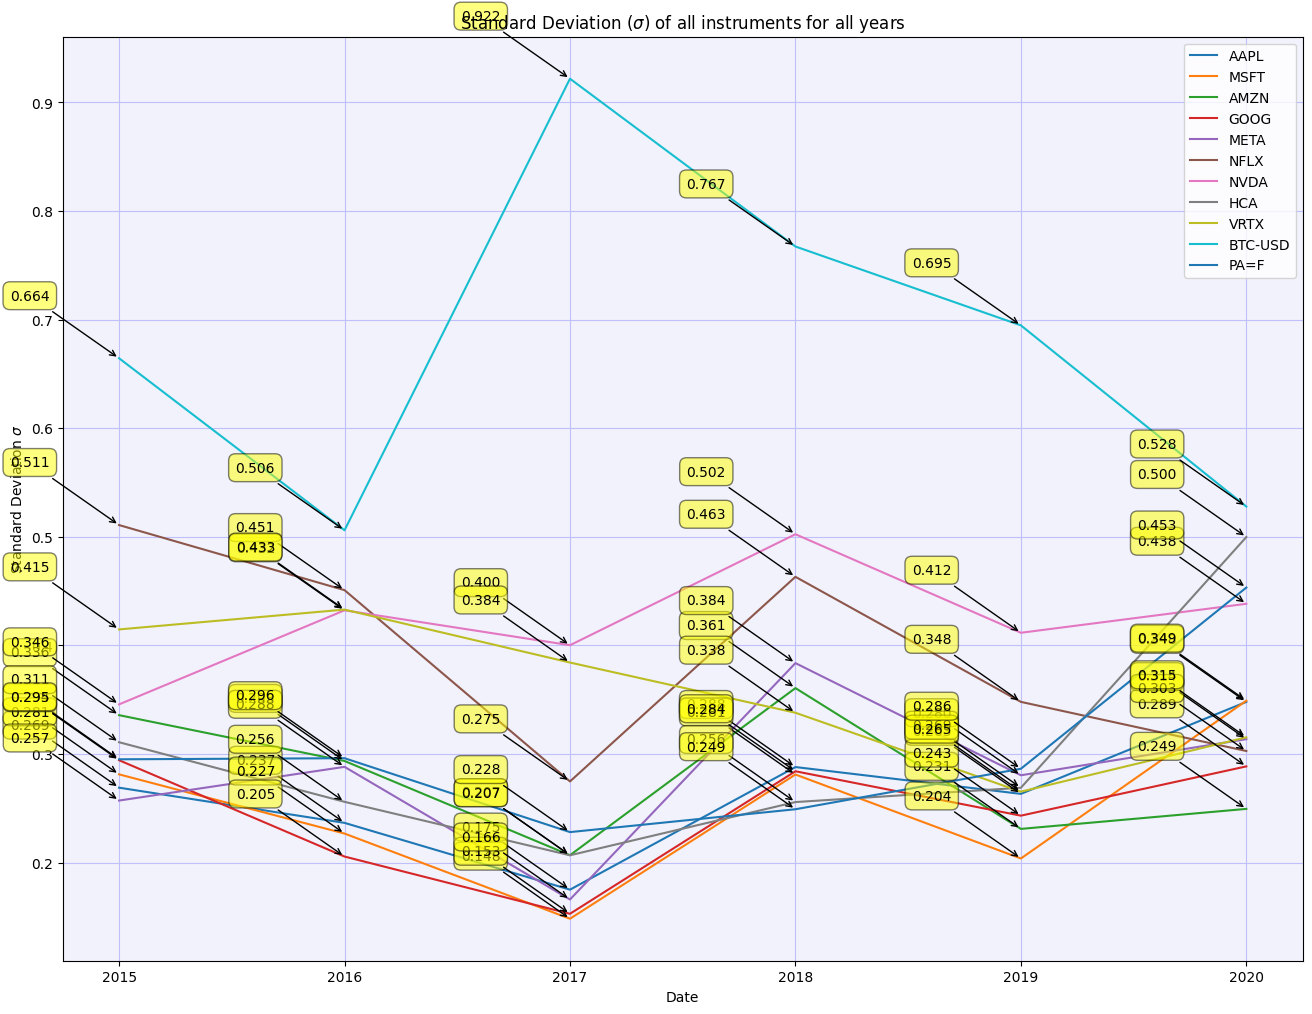

In [34]:
# configuration
fig, ax = plt.subplots(figsize = (16,12))
ax.set_title(r"Standard Deviation ($\sigma$) of all instruments for all years")
ax.set_facecolor((0.95, 0.95, 0.99))
ax.grid(c = (0.75, 0.75, 0.99))
ax.set_ylabel(r"Standard Deviation $\sigma$")
ax.set_xlabel(r"Years")
STD.plot(ax = plt.gca(),grid = True)

for instr in STD:
  stds = STD[instr]
  years = list(STD.index)
  for year, std in zip(years, stds):
    label = "%.3f"%std
    plt.annotate(label, xy = (year, std), xytext=((-1)*50, 40),textcoords = 'offset points', ha = 'right', va='bottom', bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


### 3.2.3 - Variance

In [35]:
VAR = STD **2
VAR_avg = VAR.mean()

In [36]:
VAR

,AAPL,MSFT,AMZN,GOOG,META,NFLX,NVDA,HCA,VRTX,BTC-USD,PA=F
Date,,,,,,,,,,,
2015,0.072310,0.079063,0.112684,0.086547,0.066075,0.260839,0.119446,0.096575,0.171917,0.441316,0.087044
2016,0.055935,0.051374,0.086140,0.042228,0.082992,0.203222,0.186815,0.065472,0.187389,0.255972,0.087640
2017,0.030622,0.021974,0.042732,0.023342,0.027532,0.075433,0.160072,0.042708,0.147563,0.849575,0.051983
2018,0.082885,0.078978,0.130037,0.080664,0.147160,0.214428,0.252296,0.065362,0.114186,0.588639,0.062023
2019,0.069279,0.041494,0.053338,0.059114,0.078585,0.121042,0.169371,0.072273,0.070338,0.482469,0.081984
2020,0.121038,0.121805,0.062189,0.083239,0.098329,0.091605,0.192042,0.249713,0.099397,0.278531,0.205373


In [37]:
pd.DataFrame(VAR_avg, columns = ['Average VAR']).T

,AAPL,MSFT,AMZN,GOOG,META,NFLX,NVDA,HCA,VRTX,BTC-USD,PA=F
Average VAR,0.072012,0.065782,0.081187,0.062522,0.083446,0.161095,0.180007,0.098684,0.131798,0.48275,0.096008


## 3.3 - Visualize **Return** ($R_{effective}$) vs **Risk** ($\sigma$)

C:\Users\cya\AppData\Local\Temp\ipykernel_22936\1722309797.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(instr, (STD_avg[idx] + 0.01, APY_avg[idx]))


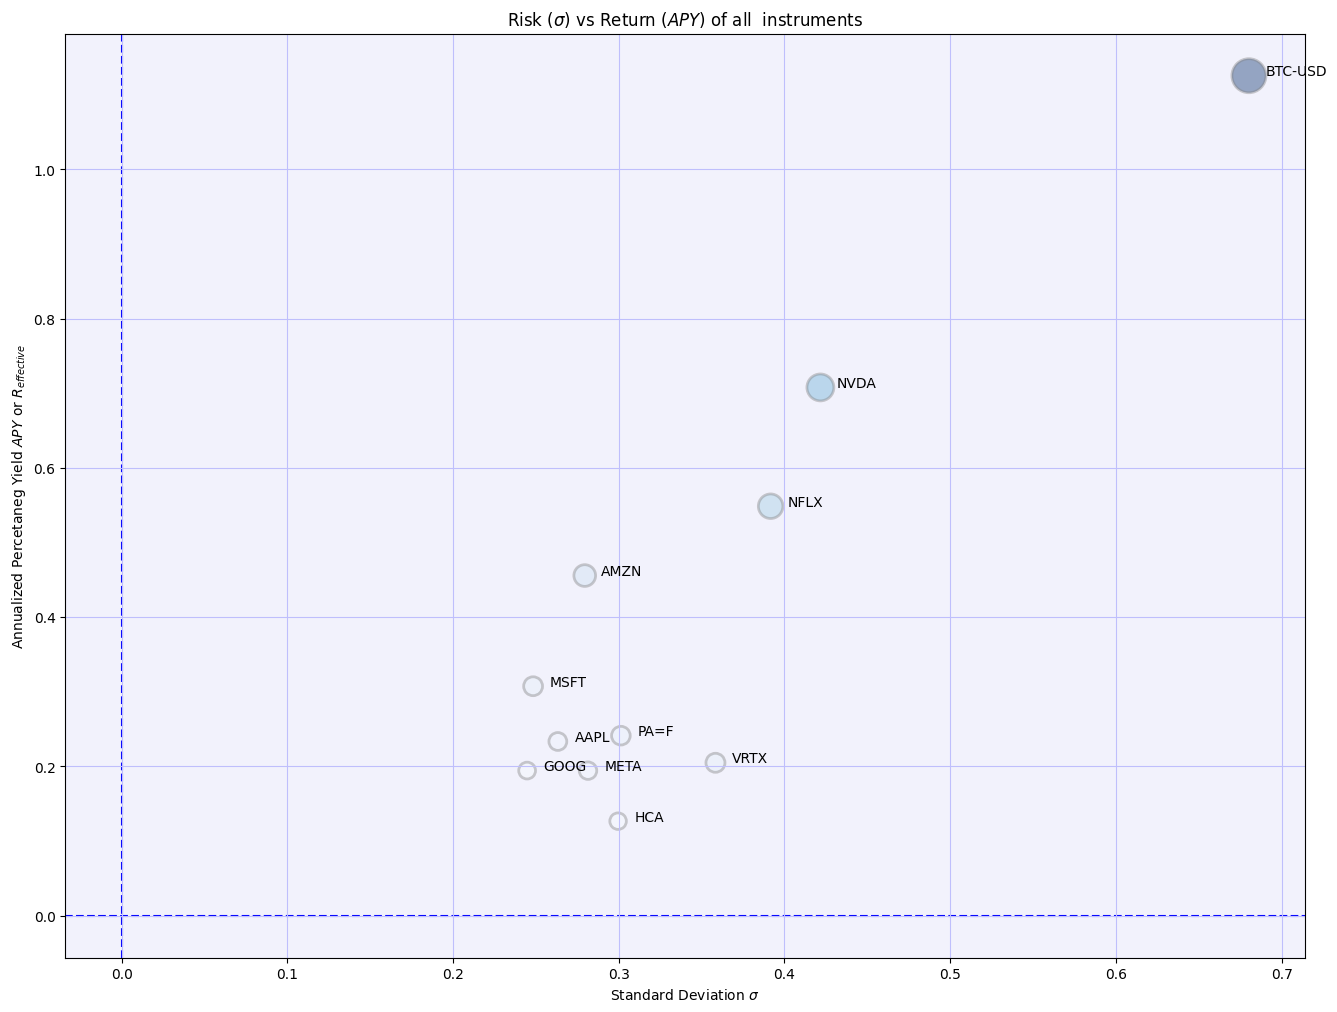

In [38]:
# configuration - generate different colors & sizes
c = [y + x for y, x in zip(APY_avg, STD_avg)]
c = list(map(lambda x : x /max(c), c))
s = list(map(lambda x : x * 600, c))


# plot
fig, ax = plt.subplots(figsize = (16,12))
ax.set_title(r"Risk ($\sigma$) vs Return ($APY$) of all  instruments")
ax.set_facecolor((0.95, 0.95, 0.99))
ax.grid(c = (0.75, 0.75, 0.99))
ax.set_xlabel(r"Standard Deviation $\sigma$")
ax.set_ylabel(r"Annualized Percetaneg Yield $APY$ or $R_{effective}$")
ax.scatter(STD_avg, APY_avg, s = s , c = c , cmap = "Blues", alpha = 0.4, edgecolors="grey", linewidth=2)
ax.axhline(y = 0.0,xmin = 0 ,xmax = 5,c = "blue",linewidth = 1.5,zorder = 0,  linestyle = 'dashed')
ax.axvline(x = 0.0,ymin = 0 ,ymax = 40,c = "blue",linewidth = 1.5,zorder = 0,  linestyle = 'dashed')
for idx, instr in enumerate(list(STD.columns)):
  ax.annotate(instr, (STD_avg[idx] + 0.01, APY_avg[idx]))



# 4 - Calculate Additional Descriptives 
---




## 4.0 - Configuration & Utility Function for visualization

In [39]:
instruments = list(log_returns.columns)
instruments

['AAPL',
 'MSFT',
 'AMZN',
 'GOOG',
 'META',
 'NFLX',
 'NVDA',
 'HCA',
 'VRTX',
 'BTC-USD',
 'PA=F']

In [40]:
def visualize_model(alpha, beta, data, model):
  fig, axs = plt.subplots(4,3, figsize = (14,10),  constrained_layout = True)
  # fig.tight_layout()
  idx = 0
  R_m = data["^GSPC"]
  del data["^GSPC"]
  for a, b, instr in zip(alpha, beta, data):
    i, j = int(idx / 3), idx % 3
    axs[i, j].set_title("Model : {} fitted for '{}'".format(model, instr))
    axs[i, j].set_facecolor((0.95, 0.95, 0.99))
    axs[i, j].grid(c = (0.75, 0.75, 0.99))
    axs[i, j].set_xlabel(r"Market (S&P500) log returns")
    axs[i, j].set_ylabel(r"{} log returns".format(instr))
    
    R = data[instr]
    y = a + b * R_m
    axs[i, j].scatter(x = R_m, y = R, label = 'Returns'.format(instr))
    axs[i, j].plot(R_m, y ,color = 'red', label = 'CAPM model')
    idx += 1

In [63]:
def visualize_statistic(statistic, title, limit=0):
    # configuration
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_facecolor((0.95, 0.95, 0.99))
    ax.grid(c=(0.75, 0.75, 0.99), axis='y')
    colors = sns.color_palette('Reds', n_colors=len(statistic))
    
    # visualize
    barlist = ax.bar(x=np.arange(len(statistic)), height=statistic)
    for b, c in zip(barlist, colors):
        b.set_color(c)
    
    ax.axhline(y=limit, xmin=-1, xmax=1, c="blue", linewidth=1.5, zorder=0, linestyle='dashed')

    # configure more
    for i, v in enumerate(statistic):
        ax.text(i - 0.22, v + 0.01, str(round(v, 3)), color='blue', fontweight='bold')
    
    plt.xticks(np.arange(len(statistic)), instruments)
    plt.title(r"{} for every instrument (i) against market (m) S&P500".format(title))
    plt.xlabel(r"Instrument")
    plt.ylabel(r"{} value".format(title))
    plt.show()


## 4.1 - Expanded CAPM (CAPM & Single-Index Model)
$$E[R] - R_f = \alpha + \beta \cdot (E[R_m] - R_f) + \epsilon$$
We calulate $\alpha, \beta$ as followed :
* $\beta = \rho_{i,m}\frac{\sigma}{\sigma_m}$
* $\alpha = (\overline{E[R]} - R_f) - \beta \cdot (\overline{E[R_m]} - R_f)$

We can also calculate a,b by fitting a linear-regression model (OLS) of the format:
$$y = \alpha + \beta x$$

We have **1 feature $x$** : the market premium $x = (E[R_m] - R_f)$. We could have more **n features $(x_1,..., x_n)$** making the prediction for the $E[R]$ more accurate (probably?) 




### 4.1.1 - Risk-Free rate $R_f$ : 13-week T-bill (^IRX)

In [43]:
# [*] Risk-Free Asset : 13 Week Tbill (^IRX). Get the most recent value
risk_free = yf.download('^IRX', start=start, end=end)['Adj Close']
risk_free = float(risk_free.tail(1).iloc[0])

[*********************100%***********************]  1 of 1 completed


In [44]:
print("Risk-Free rate (Daily T-bill) = {}".format(risk_free))

Risk-Free rate (Daily T-bill) = 0.11500000208616257


### 4.1.2 - Market $R_m$ : Assume S&P500 (^GSPC)
We load the time series for S&P500 with ticker ^GSPC. It is a 1331 x 1 dataframe (1-column because we keep only Adj. Close price). So we need first to merge market (m) with all instruments dataframe (i) to bring it on common date scale. After that we can calculate the respective `Descpritive Statistics` like before



In [46]:
# [*] Market          : S&P 500 index (^GSPC) | Yahoo Finance for index pricing, '^GSPC' is the underlying for 'SPX' options. 
market             = yf.download('^GSPC', start = start, end = end)['Adj Close']
market             = market.rename("^GSPC")
market_log_returns = market.pct_change()
log_returns_total  = pd.concat([log_returns,market_log_returns], axis = 1).dropna()

[*********************100%***********************]  1 of 1 completed


In [47]:
# Descriptive statistics
# RETURN
log_returns_total = pd.concat([log_returns,market_log_returns], axis = 1).dropna()
APR_total         = log_returns_total.groupby([log_returns_total.index.year]).agg('sum')
APR_avg_total     = APR_total.mean()
APR_avg_market    = APR_avg_total['^GSPC']
# RISK
STD_total         = log_returns_total.groupby([log_returns_total.index.year]).agg('std') * np.sqrt(N)
STD_avg_total     = STD_total.mean()
STD_avg_market    = STD_avg_total['^GSPC']

In [48]:
pd.DataFrame(APR_avg_total, columns = ['Average APR']).T

,AAPL,MSFT,AMZN,GOOG,META,NFLX,NVDA,HCA,VRTX,BTC-USD,PA=F,^GSPC
Average APR,0.209846,0.268148,0.375618,0.177724,0.177624,0.437481,0.535358,0.119294,0.186433,0.754242,0.216154,0.05022


In [49]:
pd.DataFrame(STD_avg_total, columns = ['Average STD']).T

,AAPL,MSFT,AMZN,GOOG,META,NFLX,NVDA,HCA,VRTX,BTC-USD,PA=F,^GSPC
Average STD,0.263236,0.248303,0.279472,0.244688,0.28143,0.391635,0.421664,0.299584,0.358342,0.680261,0.301271,0.155602


## 4.2 - Find Correlation $\rho$ & R squared $R^2$
---

In [50]:
# Calculate correlation ρ & R squared R^2 between all instruments (i) & market (m)
corr = log_returns.corrwith(market_log_returns)
r_squared = corr ** 2

In [51]:
pd.DataFrame(r_squared, columns = ["R squared"]).T

,AAPL,MSFT,AMZN,GOOG,META,NFLX,NVDA,HCA,VRTX,BTC-USD,PA=F
R squared,0.560004,0.638102,0.313786,0.513986,0.398167,0.211863,0.354974,0.346014,0.283053,0.015047,0.030263


## 4.3 - Apply Expanded CAPM
---

In [52]:
############################################################
##          Expanded Capital Asset Pricing Model          ##
## ______________________________________________________ ##
##       E[R] - R_f  = α + β * (E[R_M] - R_f) + 𝜖         ##
##                                                        ##
##       INPUT :  [*] E[R] = log returns, σ = STD         ##
##       OUTPUT : [*] α,β                                 ##
############################################################
def CAPM():
  # 1 - Calculate average Risk Premium for every instrument  
  # [*]  _
  #     E[R] - R_f
  # [*]   __
  #     E[R_m] - R_f
  APR_premium        = APR_avg - risk_free
  APR_market_premium = APR_avg_market - risk_free

  # 2 - Calculate α, β
  beta  = corr *  STD_avg / STD_avg_market
  alpha = APR_premium - beta * APR_market_premium 
  
  return alpha, beta

In [53]:
alpha, beta = CAPM()


### 4.3.1 - Alpha α

In [54]:
pd.DataFrame(alpha,  columns = ["Average α"]).T

,AAPL,MSFT,AMZN,GOOG,META,NFLX,NVDA,HCA,VRTX,BTC-USD,PA=F
Average α,0.176855,0.235724,0.325793,0.135756,0.136555,0.397528,0.524947,0.077659,0.150802,0.673981,0.122973


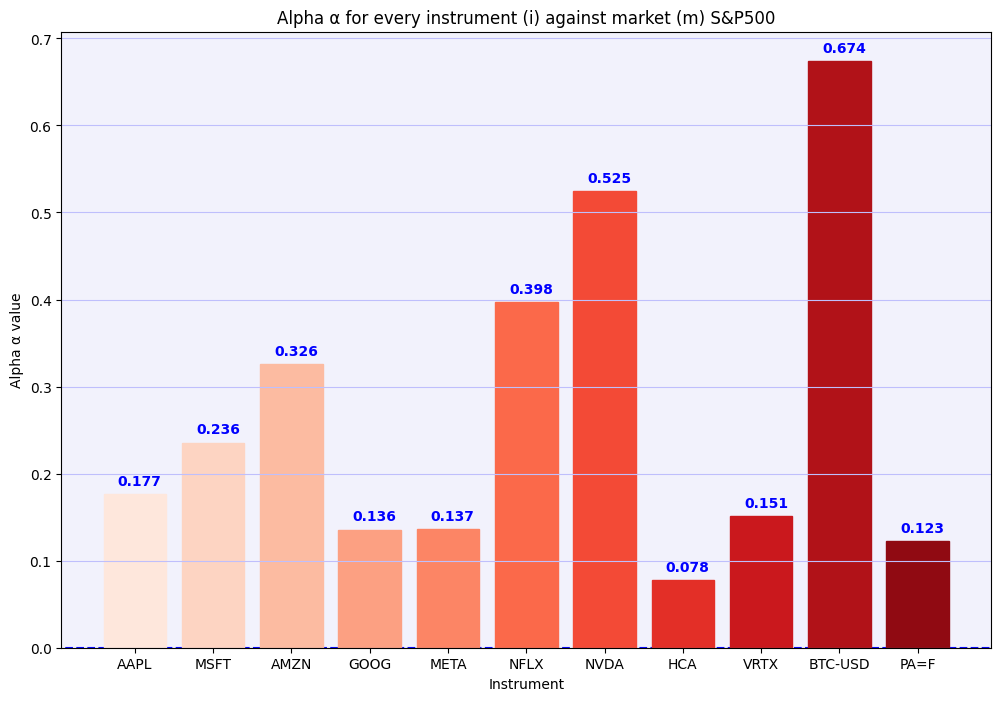

In [64]:
visualize_statistic(alpha.values, "Alpha α")

### 4.3.2 - Beta β

In [65]:
pd.DataFrame(beta,  columns = ["Average β"]).T

,AAPL,MSFT,AMZN,GOOG,META,NFLX,NVDA,HCA,VRTX,BTC-USD,PA=F
Average β,1.265973,1.274706,1.006094,1.127381,1.141266,1.158493,1.614539,1.132531,1.225224,0.536262,0.336817


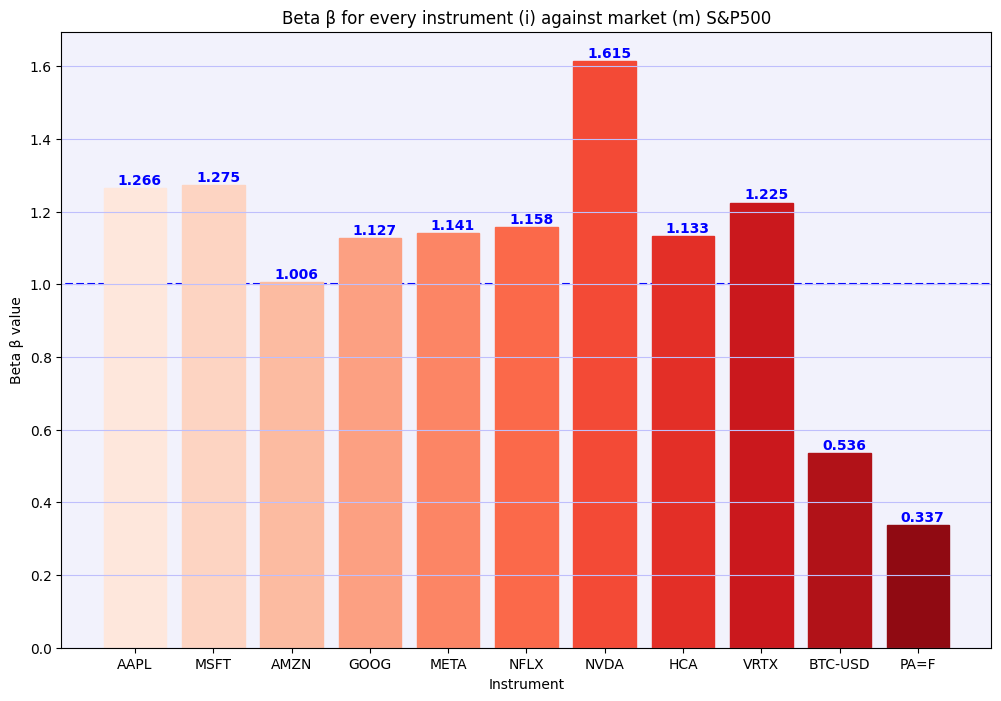

In [66]:
visualize_statistic(beta.values, "Beta β", limit = 1)

### 4.3.3 - Visualize data & CAPM

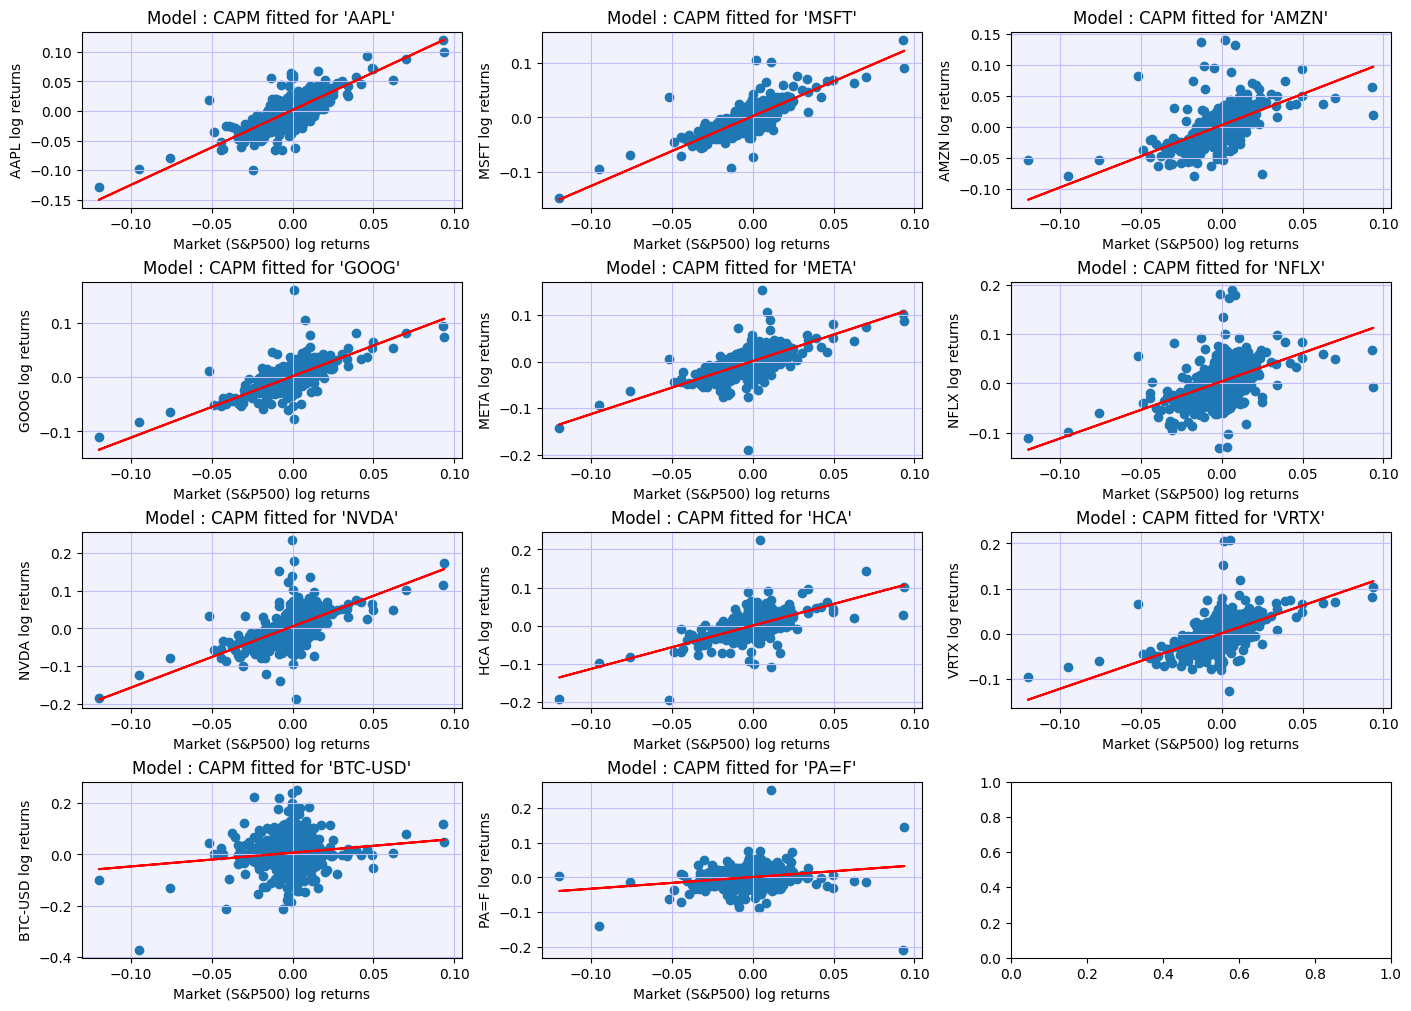

In [67]:
visualize_model(alpha/100, beta, data = log_returns_total.copy(), model = 'CAPM')

## 4.4 - Apply Linear Regression Model (OLS) $y = \alpha + \beta x$
---


In [68]:
beta_reg, alpha_reg = np.polyfit(x = log_returns_total['^GSPC'] , y = log_returns_total[log_returns.columns] ,deg = 1)

### 4.4.1 - Alpha α

In [69]:
pd.DataFrame(alpha_reg,  index = log_returns.columns ,columns = ["Average α"]).T

,AAPL,MSFT,AMZN,GOOG,META,NFLX,NVDA,HCA,VRTX,BTC-USD,PA=F
Average α,0.000705,0.000973,0.001537,0.000585,0.00058,0.001792,0.002155,0.000304,0.000606,0.003409,0.000937


### 4.4.2 - Beta β

In [70]:
pd.DataFrame(beta_reg,  index = log_returns.columns ,columns = ["Average β"]).T

,AAPL,MSFT,AMZN,GOOG,META,NFLX,NVDA,HCA,VRTX,BTC-USD,PA=F
Average β,1.176426,1.198467,0.935534,1.049444,1.068478,1.082426,1.48282,1.080967,1.13294,0.502252,0.315712


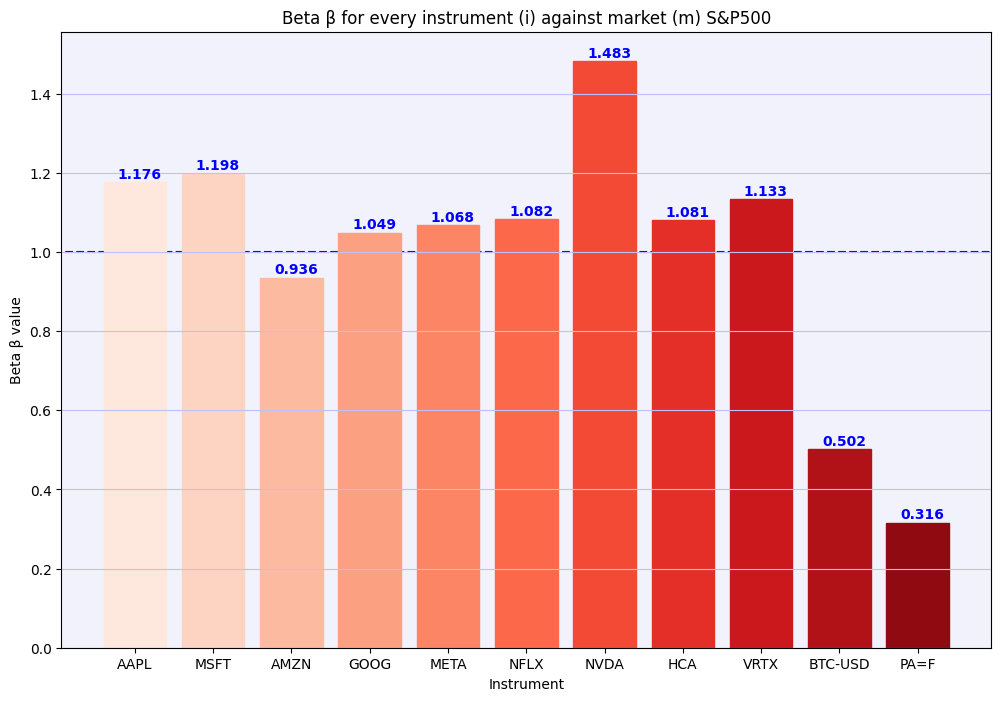

In [71]:
visualize_statistic(beta_reg, "Beta β", limit = 1)

### 4.4.3 - Visualize data & OLS

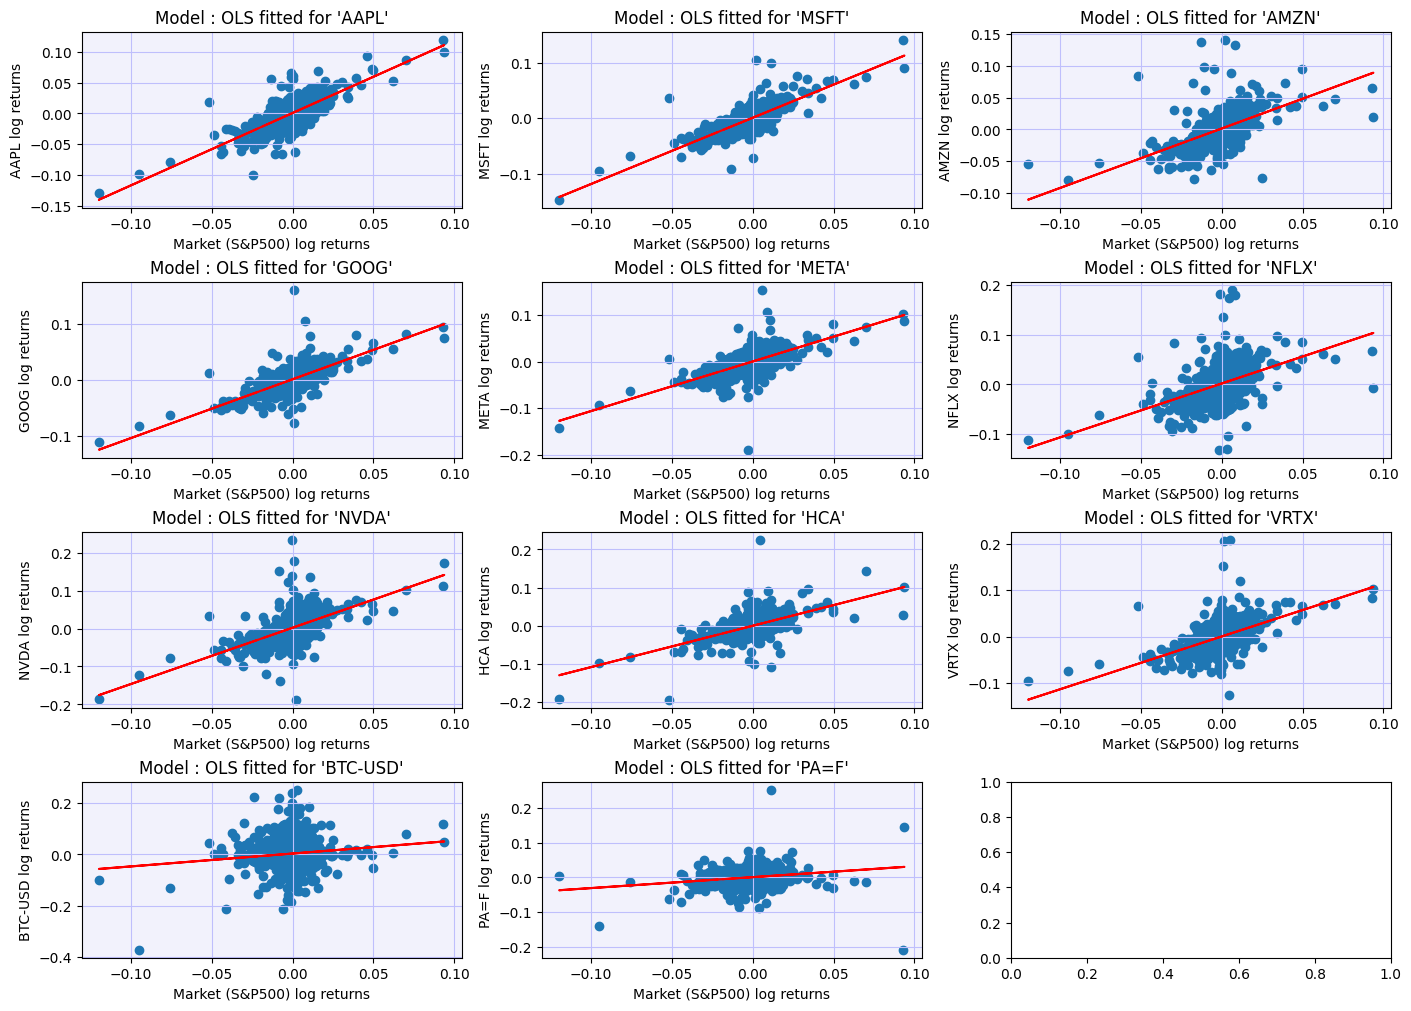

In [72]:
visualize_model(alpha_reg, beta_reg, data = log_returns_total.copy(), model = 'OLS')

# 5 - Portfolio Optimization
---

In [73]:
portfolios = {"#1 dummy (risky)" : {"Return E[R]" : 0, "Risk σ" : 0, "Sharpe Ratio SR" : 0},
              "#1 dummy (total)" : {"Return E[R]" : 0, "Risk σ" : 0, "Sharpe Ratio SR" : 0}, 
              "#2 optimized max sr (risky)" : {"Return E[R]" : 0, "Risk σ" : 0, "Sharpe Ratio SR" : 0},
              "#2 optimized max sr (total)" : {"Return E[R]" : 0, "Risk σ" : 0, "Sharpe Ratio SR" : 0},
              "#2 optimized min σ (risky)" : {"Return E[R]" : 0, "Risk σ" : 0, "Sharpe Ratio SR" : 0},
              "#2 optimized min σ (total)" : {"Return E[R]" : 0, "Risk σ" : 0, "Sharpe Ratio SR" : 0}, 
              }

## 5.1 - Portfolio #1 (the dummy portfolio)

* 7 Stocks : 45% 
* 2 Bonds : 35%
* 2 Commodities : 10%



In [74]:
# WEIGHTS, RETURN, RISK
cov = APR.cov()
weights = np.array([ 0.45/ 7] * 7 + [ 0.35 / 2] * 2 + [ 0.1 / 2] * 2)
expected_return = np.sum(APR_avg * weights)
expected_risk   = np.sqrt( np.dot(weights.T , np.dot(cov, weights)) ) 

# RISKY PORTFOLIO
portfolios["#1 dummy (risky)"]["Return E[R]"]     = expected_return
portfolios["#1 dummy (risky)"]["Risk σ"]          = expected_risk
portfolios["#1 dummy (risky)"]["Sharpe Ratio SR"] = (expected_return - risk_free) / expected_risk

# TOTAL PORTFOLIO
total_expected_return = 0.9 * expected_return + 0.1 * risk_free
total_expected_risk   = 0.9 * expected_risk
portfolios["#1 dummy (total)"]["Return E[R]"]     = total_expected_return
portfolios["#1 dummy (total)"]["Risk σ"]          = total_expected_risk
portfolios["#1 dummy (total)"]["Sharpe Ratio SR"] = (total_expected_return - risk_free) / total_expected_risk

In [75]:
portfolios_df = pd.DataFrame(portfolios).T
portfolios_df

,Return E[R],Risk σ,Sharpe Ratio SR
#1 dummy (risky),0.242280,0.185393,0.686543
#1 dummy (total),0.229552,0.166854,0.686543
#2 optimized max sr (risky),0.000000,0.000000,0.000000
#2 optimized max sr (total),0.000000,0.000000,0.000000
#2 optimized min σ (risky),0.000000,0.000000,0.000000
#2 optimized min σ (total),0.000000,0.000000,0.000000


## 5.2 - Portfolio #2 (the optimized portfolio)

* 7 Stocks : ?
* 2 Bonds : ?
* 2 Commodities : ?

### 5.2.1 - Portfolio Simulation

In [76]:
num_portfolios = 10000
generated_portfolios = [] # store the results

for idx in range(num_portfolios) :
  # 1 - select random weights for portfolio holdings & rebalance weights to sum to 1
  weights = np.array(np.random.random(11))
  weights /= np.sum(weights)

  # 2 - calculate return, risk, sharpe ratio
  expected_return = np.sum(APR_avg * weights)
  expected_risk   = np.sqrt( np.dot(weights.T , np.dot(cov, weights)) ) 
  sharpe_ratio    = ( expected_return - risk_free) / expected_risk

  # 3 - store the result
  generated_portfolios.append([ expected_return, expected_risk, sharpe_ratio, weights] )

# Locate the 2 'special' portfolios 1) maximum sharpe ratio 2) minimum risk
maximum_sr_portfolio   = sorted(generated_portfolios, key = lambda x : -x[2])[0]
minimum_risk_portfolio = sorted(generated_portfolios, key = lambda x : x[1])[0]
max_sr = maximum_sr_portfolio[2]

max_sr_weights = pd.DataFrame(maximum_sr_portfolio[3], index = log_returns.columns ,columns = ["Optimal Weights  #2 optimized max sr "]).T
min_risk_weights = pd.DataFrame(minimum_risk_portfolio[3], index = log_returns.columns ,columns = ["Optimal Weights  #2 optimized min σ "]).T


In [77]:
max_sr_weights

,AAPL,MSFT,AMZN,GOOG,META,NFLX,NVDA,HCA,VRTX,BTC-USD,PA=F
Optimal Weights #2 optimized max sr,0.006026,0.105283,0.214287,0.048252,0.003607,0.201638,0.132142,0.208504,0.038824,0.00194,0.039497


In [78]:
min_risk_weights

,AAPL,MSFT,AMZN,GOOG,META,NFLX,NVDA,HCA,VRTX,BTC-USD,PA=F
Optimal Weights #2 optimized min σ,0.007423,0.031517,0.07057,0.180281,0.043176,0.211378,0.062531,0.209917,0.014678,0.010033,0.158496


In [79]:
# RISKY PORTFOLIOS
portfolios["#2 optimized max sr (risky)"]["Return E[R]"]     = maximum_sr_portfolio[0]
portfolios["#2 optimized max sr (risky)"]["Risk σ"]          = maximum_sr_portfolio[1]
portfolios["#2 optimized max sr (risky)"]["Sharpe Ratio SR"] = (maximum_sr_portfolio[0] - risk_free) / maximum_sr_portfolio[1]
portfolios["#2 optimized min σ (risky)"]["Return E[R]"]      = minimum_risk_portfolio[0]
portfolios["#2 optimized min σ (risky)"]["Risk σ"]           = minimum_risk_portfolio[1]
portfolios["#2 optimized min σ (risky)"]["Sharpe Ratio SR"]  = (minimum_risk_portfolio[0] - risk_free) / minimum_risk_portfolio[1]

# TOTAL PORTFOLIOS
total_expected_return = 0.9 * maximum_sr_portfolio[0] + 0.1 * risk_free
total_expected_risk   = 0.9 * maximum_sr_portfolio[1]
portfolios["#2 optimized max sr (total)"]["Return E[R]"]     = total_expected_return
portfolios["#2 optimized max sr (total)"]["Risk σ"]          = total_expected_risk
portfolios["#2 optimized max sr (total)"]["Sharpe Ratio SR"] = (total_expected_return - risk_free) / total_expected_risk
total_expected_return = 0.9 * minimum_risk_portfolio[0] + 0.1 * risk_free
total_expected_risk   = 0.9 * minimum_risk_portfolio[1]
portfolios["#2 optimized min σ (total)"]["Return E[R]"]      = total_expected_return
portfolios["#2 optimized min σ (total)"]["Risk σ"]           = total_expected_risk
portfolios["#2 optimized min σ (total)"]["Sharpe Ratio SR"]  = (total_expected_return - risk_free) / total_expected_risk

In [80]:
portfolios_df = pd.DataFrame(portfolios).T
portfolios_df

,Return E[R],Risk σ,Sharpe Ratio SR
#1 dummy (risky),0.242280,0.185393,0.686543
#1 dummy (total),0.229552,0.166854,0.686543
#2 optimized max sr (risky),0.320270,0.122704,1.672885
#2 optimized max sr (total),0.299743,0.110434,1.672885
#2 optimized min σ (risky),0.271781,0.116524,1.345481
#2 optimized min σ (total),0.256103,0.104872,1.345481


### 5.2.2 - Portfolio Simulation Visulization

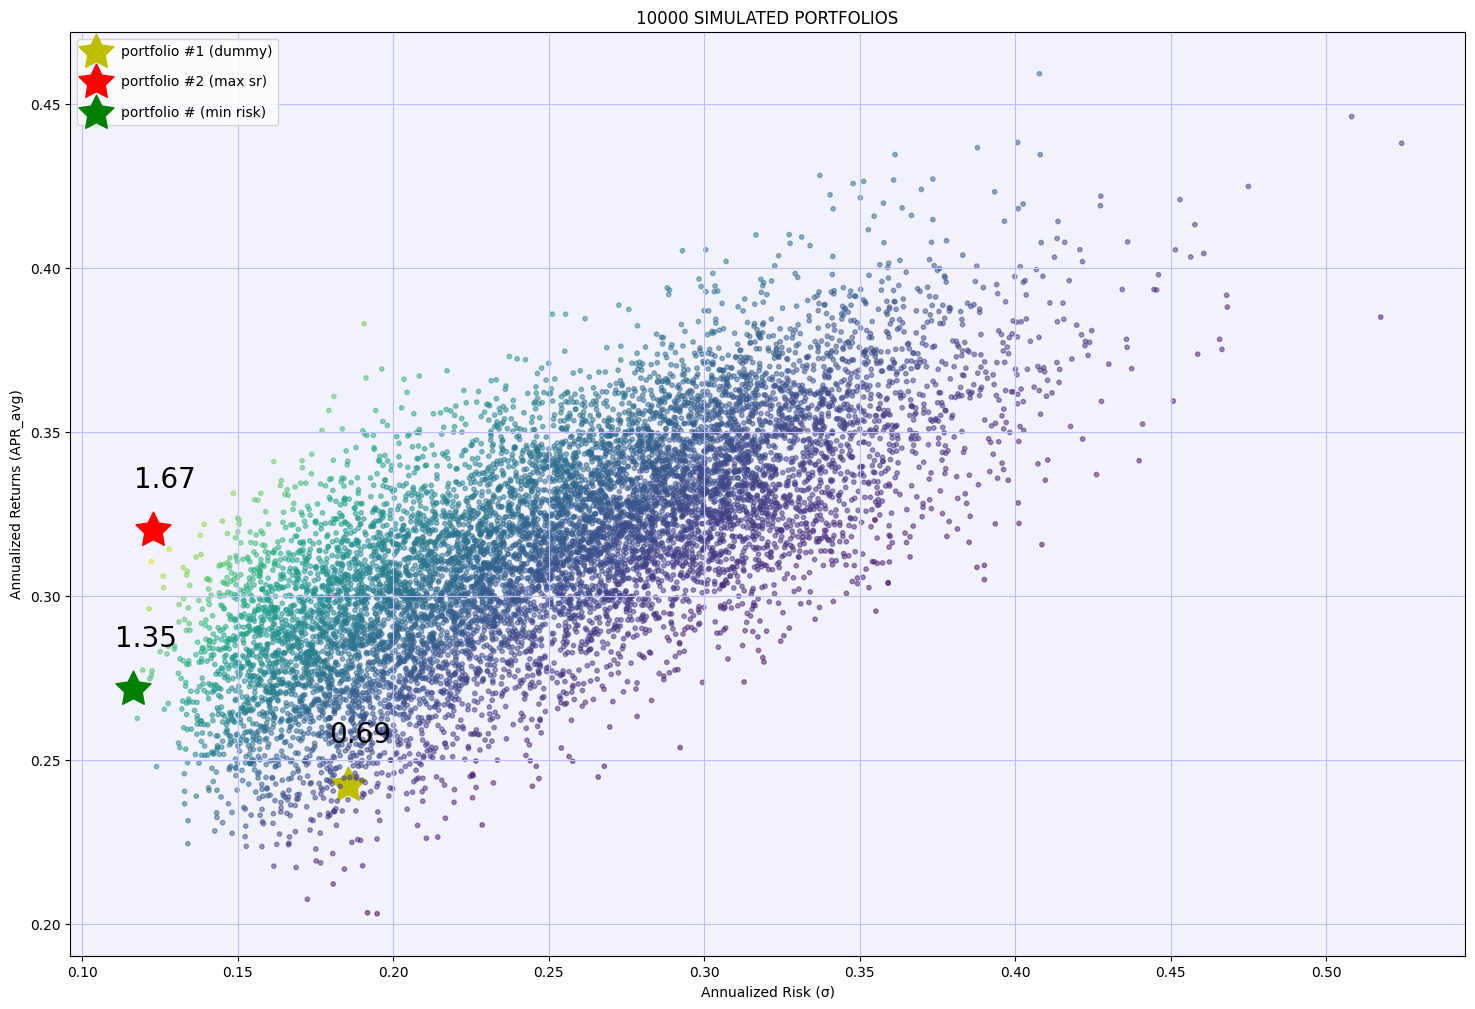

In [87]:
# plot the 2 optimized portfolios along with the rest 9998
def plot_simulation(CAL = None, INSTRUMENTS = None) :
  fig, ax = plt.subplots(figsize = (18,12))
  ax.set_facecolor((0.95, 0.95, 0.99))
  ax.grid(c = (0.75, 0.75, 0.99))
  # portfolio #1
  ret  = portfolios["#1 dummy (risky)"]["Return E[R]"]
  risk = portfolios["#1 dummy (risky)"]["Risk σ"]
  sr   = (ret - risk_free) / risk
  ax.scatter(risk, ret, marker = (5,1,0),color = 'y',s = 700, label = 'portfolio #1 (dummy)')
  ax.annotate(round(sr, 2), (risk - 0.006,ret + 0.013),  fontsize = 20, color = 'black')
 
  # portfolio #2
  ret, risk, sr = [x[0] for x in generated_portfolios], [x[1] for x in generated_portfolios], [x[2] for x in generated_portfolios]
  ax.scatter(risk, ret, c = sr, cmap = 'viridis', marker = 'o', s = 10, alpha = 0.5)
  ax.scatter(maximum_sr_portfolio[1], maximum_sr_portfolio[0],marker = (5,1,0),color = 'r',s = 700, label = 'portfolio #2 (max sr)')
  ax.annotate(round(maximum_sr_portfolio[2], 2), (maximum_sr_portfolio[1]  - 0.006,maximum_sr_portfolio[0] + 0.013), fontsize = 20, color = 'black')
  ax.scatter(minimum_risk_portfolio[1], minimum_risk_portfolio[0], marker = (5,1,0), color = 'g',s = 700,  label = 'portfolio # (min risk)')
  ax.annotate(round(minimum_risk_portfolio[2], 2), (minimum_risk_portfolio[1]  - 0.006,minimum_risk_portfolio[0] + 0.013), fontsize = 20, color = 'black')
  # CAL? EFFICIENT FRONTIER?
  if CAL :
    ax.plot(CAL[0], CAL[1], linestyle = '-', color = 'red', label = 'CAL')

  if INSTRUMENTS : 
    ax.scatter(STD_avg, APR_avg, s = s , c = c , cmap = "Blues", alpha = 0.4, edgecolors = "grey", linewidth = 2)
    for idx, instr in enumerate(list(STD.columns)):
      sr = round((APR_avg[idx] - risk_free) / STD_avg[idx] , 2)
      ax.annotate(instr, (STD_avg[idx] + 0.01, APR_avg[idx]))
      ax.annotate(sr, (STD_avg[idx] - 0.005 , APR_avg[idx] + 0.015))

  ax.set_title('10000 SIMULATED PORTFOLIOS')
  ax.set_xlabel('Annualized Risk (σ)')
  ax.set_ylabel('Annualized Returns (APR_avg)')
  ax.legend(labelspacing = 1.2)

plot_simulation()


### 5.2.3 - Capital Allocation Line (CAL)
One Capital Allocation line per portfolio. It is the frontier when taking into account the risk free instrument in the portfolio.

In [88]:
##################################################################
#						            E[R_optimal] - R_rf 				             #
#			E[R_p] = R_rf + ---------------------- σ_p 			           #
#									           σ_optimal				                   #
#							        |                     |                    #
#                     |_____________________|                    #
#                            SR_optimal                          #
##################################################################
cal_x  = np.linspace(0.0, 0.3, 50)
cal_y = risk_free + cal_x * max_sr

C:\Users\cya\AppData\Local\Temp\ipykernel_22936\1282168864.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sr = round((APR_avg[idx] - risk_free) / STD_avg[idx] , 2)
C:\Users\cya\AppData\Local\Temp\ipykernel_22936\1282168864.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(instr, (STD_avg[idx] + 0.01, APR_avg[idx]))
C:\Users\cya\AppData\Local\Temp\ipykernel_22936\1282168864.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser

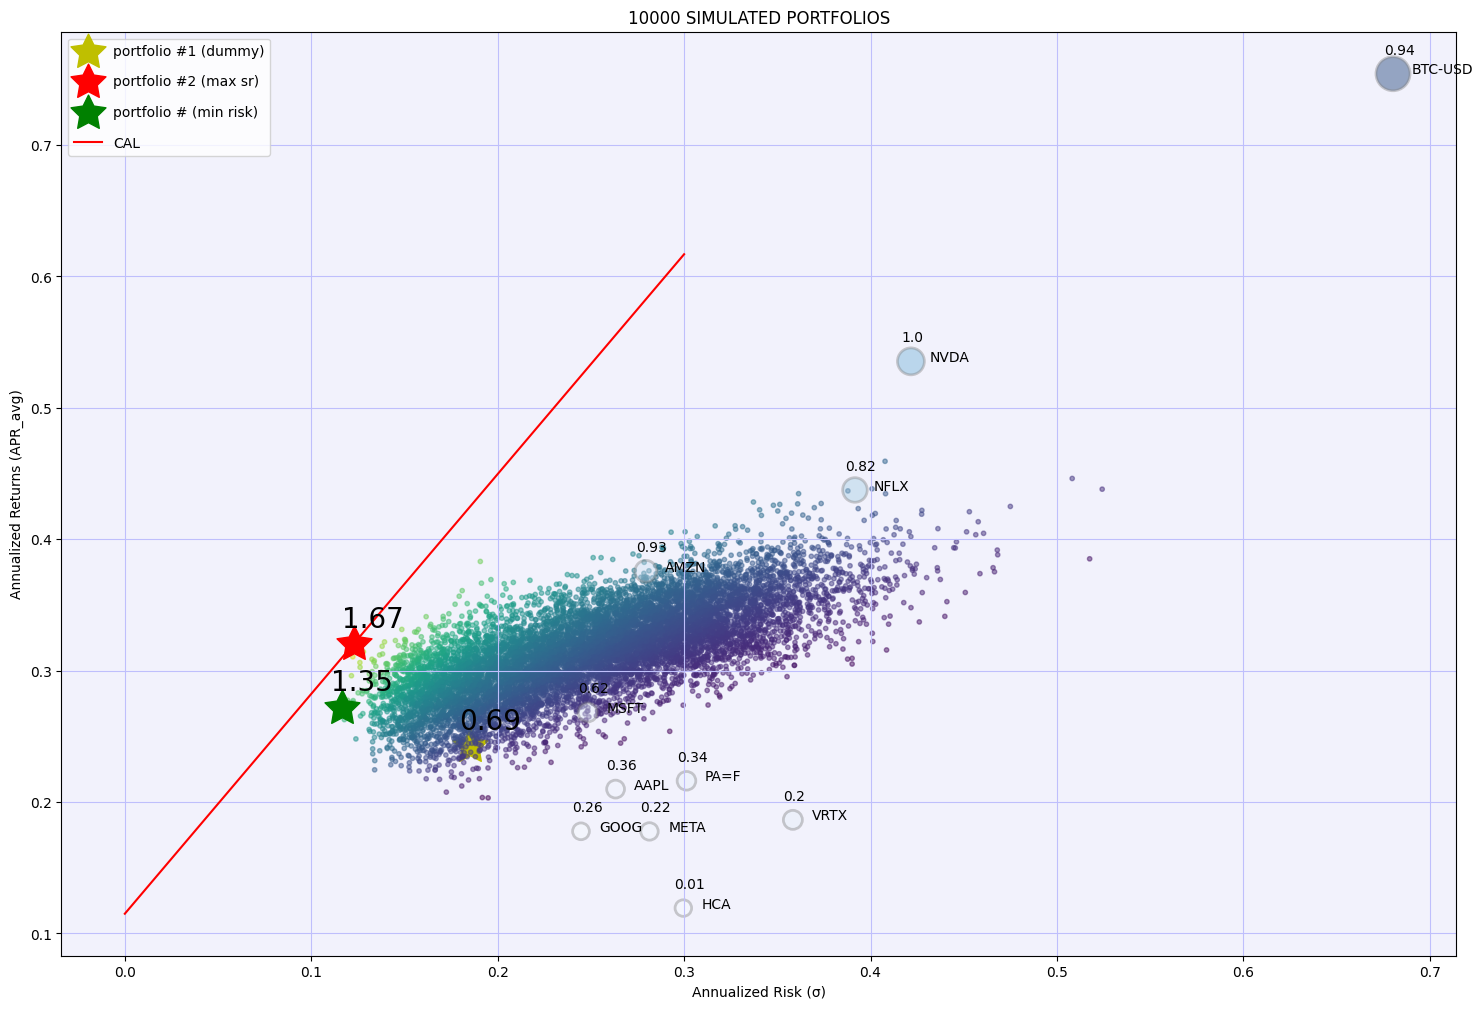

In [89]:
plot_simulation(CAL = [cal_x, cal_y] , INSTRUMENTS = 'yes')

# 6 - Utility Function
---
$$U = E[r] - \frac{1}{2}A\sigma^2$$

In [90]:
A = np.linspace(0, 10, 10)
utility_dummy    = portfolios["#1 dummy (total)"]["Return E[R]"] - 1/2 * A * portfolios["#1 dummy (total)"]["Risk σ"] ** 2
utility_max_sr   = portfolios["#2 optimized max sr (total)"]["Return E[R]"] - 1/2 * A * portfolios["#2 optimized max sr (total)"]["Risk σ"] ** 2
utility_min_risk = portfolios["#2 optimized min σ (total)"]["Return E[R]"] - 1/2 * A * portfolios["#2 optimized min σ (total)"]["Risk σ"] ** 2

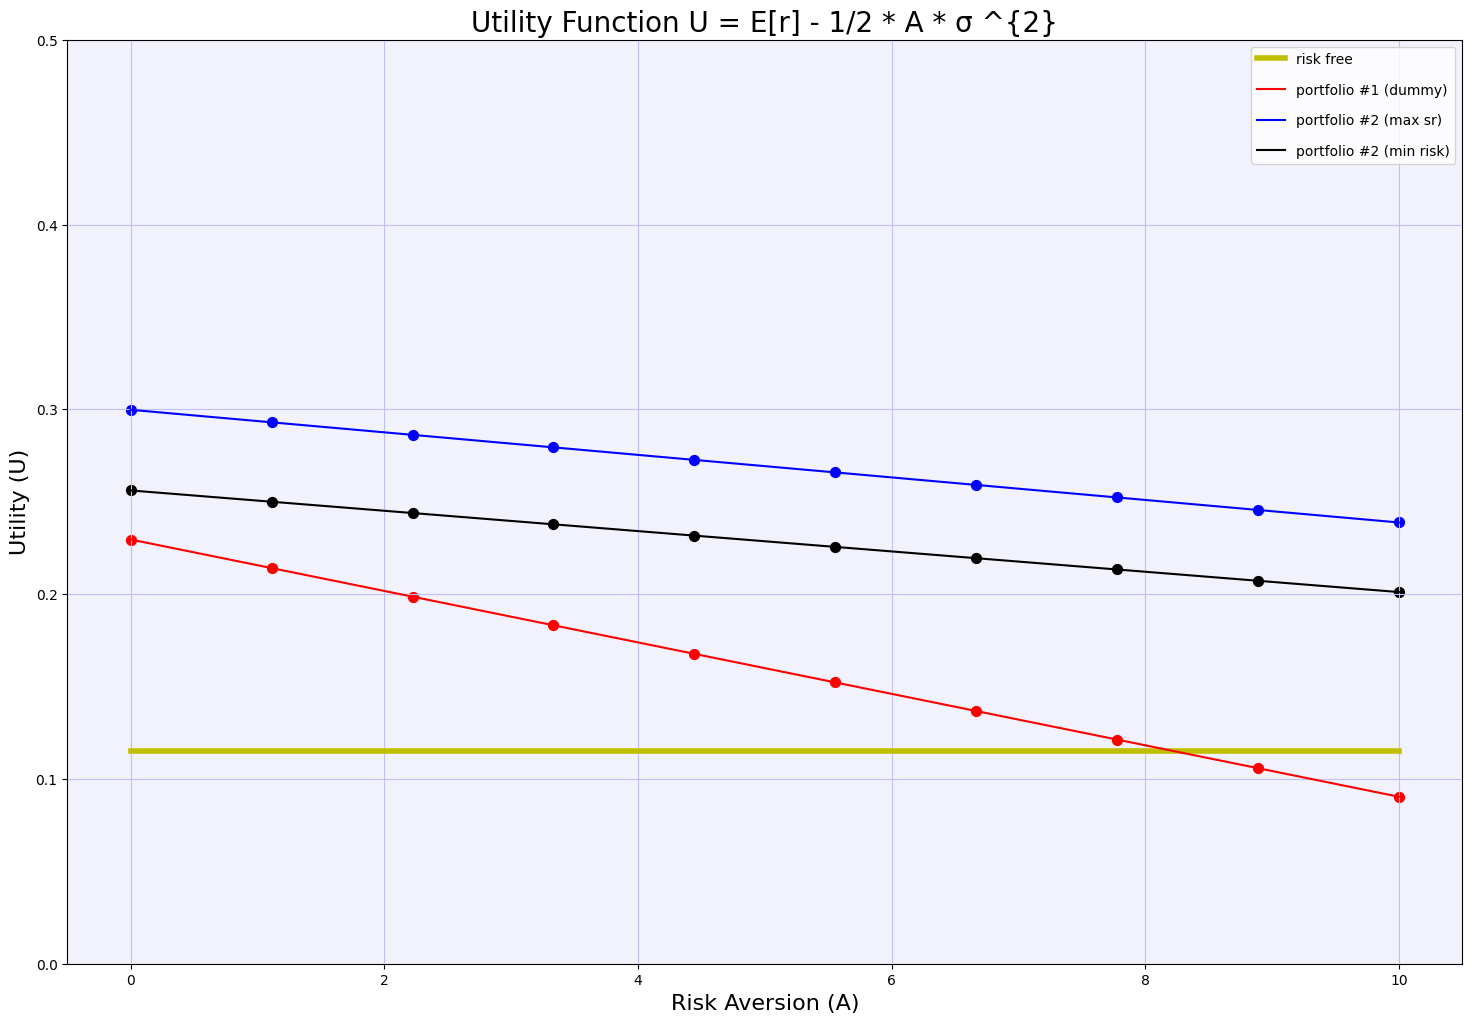

In [91]:
fig, ax = plt.subplots(figsize = (18,12))
ax.set_facecolor((0.95, 0.95, 0.99))
ax.grid(c = (0.75, 0.75, 0.99))

# Risk Free
ax.plot(A, [risk_free] * 10, color = 'y', label = 'risk free', linewidth = 4)

# Portfolio #1
ax.scatter(A, utility_dummy, color = 'r',s = 50)
ax.plot(A, utility_dummy, color = 'r', label = 'portfolio #1 (dummy)')

# Portfolio #2 (max sr)
ax.scatter(A, utility_max_sr, color = 'b',s = 50)
ax.plot(A, utility_max_sr, color = 'b', label = 'portfolio #2 (max sr)')

# Portfolio #2 (min risk)
ax.scatter(A, utility_min_risk, color = 'black',s = 50)
ax.plot(A, utility_min_risk, color = 'black', label = 'portfolio #2 (min risk)')

ax.set_title('Utility Function U = E[r] - 1/2 * A * σ ^{2}', fontsize = 20)
ax.set_xlabel('Risk Aversion (A)', fontsize = 16)
ax.set_ylabel('Utility (U)', fontsize = 16)
ax.set_ylim([0, 0.5])
ax.legend(labelspacing = 1.2)



# 7 - Final Evaluation
---

In [93]:
portfolio = portfolios["#2 optimized max sr (total)"]
ret       = portfolio['Return E[R]']
risk      = portfolio['Risk σ']
sr        = portfolio['Sharpe Ratio SR']
utility   = ret - 1/2 * 3 * risk ** 2

portfolio = pd.DataFrame([str(round(ret * 100, 2)) + "%", str(round(risk * 100, 2)) + "%", sr, str(round(utility * 100, 2) ) + "%"], index = ['Return E[R]', 'Risk σ', 'Sharpe Ratio SR', 'Utility U'] ,columns = ["Portfolio #2 optimized max sr "]).T
portfolio

,Return E[R],Risk σ,Sharpe Ratio SR,Utility U
Portfolio #2 optimized max sr,29.97%,11.04%,1.672885,28.14%
